# Looping Over Collections - Lab

## Introduction
In this lab, we will be practicing what we know about `for` loops. We will use them to reduce the amount of code we write by hand to iterate through collections. We will use data from the excel file, `cities.xlsx`, that has data on different cities, their populations, and their areas. Finally, we will use this information to plot and compare each city. Let's get started!

## Objectives

You will be able to:

* Use a `for` loop to iterate over a collection

## Identifying When To Use a For Loop

In the last lesson, we worked with some of our travel data.  Additional data has been compiled in the `cities.xlsx` excel spreadsheet. Let's retrieve this data from excel using the Pandas library. Don't worry if Pandas feels unfamiliar, it will be covered in detail later. For now, just follow the provided code and get a feel for what is happening. First, read the information from the excel file as a list of dictionaries, with each dictionary representing a location. Then, assign this list to the variable `cities`.

In [1]:
import pandas as pd
file_name = './cities.xlsx'
travel_df = pd.read_excel(file_name)
cities = travel_df.to_dict('records')

In [25]:
travel_df.head()

,City,Country,Population,Area
0,Buenos Aires,Argentina,2891000,4758
1,Toronto,Canada,2800000,2731
2,Pyeongchang,South Korea,2581000,3194
3,Marakesh,Morocco,928850,200
4,Albuquerque,New Mexico,559277,491


In [29]:
populations = travel_df['Population']
populations

0     2891000
1     2800000
2     2581000
3      928850
4      559277
5      287651
6       84554
7       60000
8       32237
9        4000
10       1700
11          0
Name: Population, dtype: int64

In [35]:
areas = travel_df['Area']
areas

0     4758
1     2731
2     3194
3      200
4      491
5     3750
6       68
7     8300
8       33
9       27
10      59
11     672
Name: Area, dtype: int64

Next, retrieve the first three city names, stored as the `'City'` attribute of each dictionary, and `'Population'` of each of the cities.  Then plot the names as our `x_values` and the populations as our `y_values` using the `matplotlib` library. Again, don't worry about understanding all of the details behind what `matplotlib` is doing. It will be covered in more detail soon.

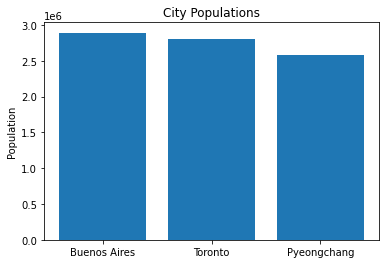

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

x_values = [cities[0]['City'], cities[1]['City'], cities[2]['City']]
y_values = [cities[0]['Population'], cities[1]['Population'], cities[2]['Population']]
 
plt.bar(x_values, y_values)
plt.ylabel('Population')
plt.title('City Populations')
 
plt.show()

Of course, as you may have spotted, there is a good amount of repetition in displaying this data.  Just take a look at how we retrieved the data for our `x_values` and `y_values`. And you'll notice that, unless we know the exact number of cities and populations in our excel file, this method of retrieving data might miss some data or try to access values that don't exist. 

We can take a close look at this below:

In [3]:
x_values = [cities[0]['City'], cities[1]['City'], cities[2]['City']]
y_values = [cities[0]['Population'], cities[1]['Population'], cities[2]['Population']]

As we can see, if we have any more than 3 lines of data, our `x_values` and `y_values` will be incomplete, and if we had only 2 lines of data, our code would break.

So in this lesson, we will use `for` loop to display information about our travel locations with less repetition and more accuracy.

## Instructions

Before we get into creating graphs from our cities data, let's get a bit more comfortable with the data we are working with. Let's see if we can iterate through just one element (i.e. a city **dictionary** object) to get the **area**. 

In [4]:
buenos_aires = cities[0]
buenos_aires

{'City': 'Buenos Aires',
 'Country': 'Argentina',
 'Population': 2891000,
 'Area': 4758}

In [5]:
# here we want to find just the area of buenos_aires
buenos_aires_area = cities[0]['Area']
buenos_aires_area

4758

Now that we have a bit more familiarity with our dictionaries, we can move to gathering all the information we need to create our traces. 

Our `cities` list contains information about the top 12 cities.  For our upcoming iteration tasks, it will be useful to have a list of the numbers 0 through 11.  Use what we know about `len` and `range`to generate a list of numbers 0 through 11.  Assign this to a variable called `city_indices`.

In [6]:
city_indices = list(range(0, len(cities)))
city_indices # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Now, using the `cities` list, we want to create a list of the names for each city. Loop through each city and append it's name (`'City'`) to the `city_names` list. 

In [7]:
city_names = [cities]

city_names

[[{'City': 'Buenos Aires',
   'Country': 'Argentina',
   'Population': 2891000,
   'Area': 4758},
  {'City': 'Toronto',
   'Country': 'Canada',
   'Population': 2800000,
   'Area': 2731},
  {'City': 'Pyeongchang',
   'Country': 'South Korea',
   'Population': 2581000,
   'Area': 3194},
  {'City': 'Marakesh',
   'Country': 'Morocco',
   'Population': 928850,
   'Area': 200},
  {'City': 'Albuquerque',
   'Country': 'New Mexico',
   'Population': 559277,
   'Area': 491},
  {'City': 'Los Cabos',
   'Country': 'Mexico',
   'Population': 287651,
   'Area': 3750},
  {'City': 'Greenville', 'Country': 'USA', 'Population': 84554, 'Area': 68},
  {'City': 'Archipelago Sea',
   'Country': 'Finland',
   'Population': 60000,
   'Area': 8300},
  {'City': 'Walla Walla Valley',
   'Country': 'USA',
   'Population': 32237,
   'Area': 33},
  {'City': 'Salina Island',
   'Country': 'Italy',
   'Population': 4000,
   'Area': 27},
  {'City': 'Solta', 'Country': 'Croatia', 'Population': 1700, 'Area': 59},
  {

Your task is to assign the variable `names_and_ranks` to a list, with each element equal to the city name and its corresponding rank.  For example, the first element would be, `"1. Buenos Aires"` and the second would be `"2. Toronto"`. Luckily for us, the list of cities that we read from our excel file is already in order by most populous to least. So, all we need to do is add numbers 1 through 12 to the beginning of each city name.

Use a `for` loop and the lists `city_indices` and `city_names` to accomplish this.  We'll need to perform some nifty string interpolation to format our strings properly.  Check out [f-string interpolation](https://www.programiz.com/python-programming/string-interpolation#f) to see how we can pass values into a string.  Remember that list indices start at zero, but we want our `names_and_ranks` list to start at one!

In [8]:
city_names

[[{'City': 'Buenos Aires',
   'Country': 'Argentina',
   'Population': 2891000,
   'Area': 4758},
  {'City': 'Toronto',
   'Country': 'Canada',
   'Population': 2800000,
   'Area': 2731},
  {'City': 'Pyeongchang',
   'Country': 'South Korea',
   'Population': 2581000,
   'Area': 3194},
  {'City': 'Marakesh',
   'Country': 'Morocco',
   'Population': 928850,
   'Area': 200},
  {'City': 'Albuquerque',
   'Country': 'New Mexico',
   'Population': 559277,
   'Area': 491},
  {'City': 'Los Cabos',
   'Country': 'Mexico',
   'Population': 287651,
   'Area': 3750},
  {'City': 'Greenville', 'Country': 'USA', 'Population': 84554, 'Area': 68},
  {'City': 'Archipelago Sea',
   'Country': 'Finland',
   'Population': 60000,
   'Area': 8300},
  {'City': 'Walla Walla Valley',
   'Country': 'USA',
   'Population': 32237,
   'Area': 33},
  {'City': 'Salina Island',
   'Country': 'Italy',
   'Population': 4000,
   'Area': 27},
  {'City': 'Solta', 'Country': 'Croatia', 'Population': 1700, 'Area': 59},
  {

In [28]:
city_indices = list(range(0,len(cities)))
city_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [19]:
# write a for loop that adds the properly formatted string to the names_and_ranks list
names = city_names
ranks = city_indices
names_and_ranks = []
for name, rank in zip(names, ranks):
    formatted_string = f"{rank}.{name}"
    names_and_ranks.append(formatted_string)

for item in names_and_ranks:
    print(item)

0.[{'City': 'Buenos Aires', 'Country': 'Argentina', 'Population': 2891000, 'Area': 4758}, {'City': 'Toronto', 'Country': 'Canada', 'Population': 2800000, 'Area': 2731}, {'City': 'Pyeongchang', 'Country': 'South Korea', 'Population': 2581000, 'Area': 3194}, {'City': 'Marakesh', 'Country': 'Morocco', 'Population': 928850, 'Area': 200}, {'City': 'Albuquerque', 'Country': 'New Mexico', 'Population': 559277, 'Area': 491}, {'City': 'Los Cabos', 'Country': 'Mexico', 'Population': 287651, 'Area': 3750}, {'City': 'Greenville', 'Country': 'USA', 'Population': 84554, 'Area': 68}, {'City': 'Archipelago Sea', 'Country': 'Finland', 'Population': 60000, 'Area': 8300}, {'City': 'Walla Walla Valley', 'Country': 'USA', 'Population': 32237, 'Area': 33}, {'City': 'Salina Island', 'Country': 'Italy', 'Population': 4000, 'Area': 27}, {'City': 'Solta', 'Country': 'Croatia', 'Population': 1700, 'Area': 59}, {'City': 'Iguazu Falls', 'Country': 'Argentina', 'Population': 0, 'Area': 672}]


In [20]:
# run this cell to check that your output matches the format
print(names_and_ranks[0]) # '1. Buenos Aires'
print(names_and_ranks[1]) # '2. Toronto'
print(names_and_ranks[-1]) # '12. Iguazu Falls'

0.[{'City': 'Buenos Aires', 'Country': 'Argentina', 'Population': 2891000, 'Area': 4758}, {'City': 'Toronto', 'Country': 'Canada', 'Population': 2800000, 'Area': 2731}, {'City': 'Pyeongchang', 'Country': 'South Korea', 'Population': 2581000, 'Area': 3194}, {'City': 'Marakesh', 'Country': 'Morocco', 'Population': 928850, 'Area': 200}, {'City': 'Albuquerque', 'Country': 'New Mexico', 'Population': 559277, 'Area': 491}, {'City': 'Los Cabos', 'Country': 'Mexico', 'Population': 287651, 'Area': 3750}, {'City': 'Greenville', 'Country': 'USA', 'Population': 84554, 'Area': 68}, {'City': 'Archipelago Sea', 'Country': 'Finland', 'Population': 60000, 'Area': 8300}, {'City': 'Walla Walla Valley', 'Country': 'USA', 'Population': 32237, 'Area': 33}, {'City': 'Salina Island', 'Country': 'Italy', 'Population': 4000, 'Area': 27}, {'City': 'Solta', 'Country': 'Croatia', 'Population': 1700, 'Area': 59}, {'City': 'Iguazu Falls', 'Country': 'Argentina', 'Population': 0, 'Area': 672}]


IndexError: list index out of range

Ok, now use another `for` loop to iterate through our list of `cities` and create a new list called `city_populations` that has the population for each city (`Population`).

In [31]:
city_populations = []
# use a for loop to iterate through the list of cities with their corresponding population
for city, population in zip(cities, populations):
    formatted_string = f"City:{city}, Population:{population}"
    city_populations.append(formatted_string)
    
for item in city_populations:
    print(item)

City:{'City': 'Buenos Aires', 'Country': 'Argentina', 'Population': 2891000, 'Area': 4758}, Population:2891000
City:{'City': 'Toronto', 'Country': 'Canada', 'Population': 2800000, 'Area': 2731}, Population:2800000
City:{'City': 'Pyeongchang', 'Country': 'South Korea', 'Population': 2581000, 'Area': 3194}, Population:2581000
City:{'City': 'Marakesh', 'Country': 'Morocco', 'Population': 928850, 'Area': 200}, Population:928850
City:{'City': 'Albuquerque', 'Country': 'New Mexico', 'Population': 559277, 'Area': 491}, Population:559277
City:{'City': 'Los Cabos', 'Country': 'Mexico', 'Population': 287651, 'Area': 3750}, Population:287651
City:{'City': 'Greenville', 'Country': 'USA', 'Population': 84554, 'Area': 68}, Population:84554
City:{'City': 'Archipelago Sea', 'Country': 'Finland', 'Population': 60000, 'Area': 8300}, Population:60000
City:{'City': 'Walla Walla Valley', 'Country': 'USA', 'Population': 32237, 'Area': 33}, Population:32237
City:{'City': 'Salina Island', 'Country': 'Italy', 

In [32]:
print(city_populations[0]) # 2891000
print(city_populations[1]) # 2800000
print(city_populations[-1]) # 0

City:{'City': 'Buenos Aires', 'Country': 'Argentina', 'Population': 2891000, 'Area': 4758}, Population:2891000
City:{'City': 'Toronto', 'Country': 'Canada', 'Population': 2800000, 'Area': 2731}, Population:2800000
City:{'City': 'Iguazu Falls', 'Country': 'Argentina', 'Population': 0, 'Area': 672}, Population:0


Great! Now we can begin to plot this data. Again, we'll used `matplotlib` to create a bar graph with our cities and their respective population data. To do this, we use the `.bar()` function and pass in our x-axis and y-axis values, add a label and title, and finally we call the `.show()` function to view our new bar graph. 

> **Note:** In the example below, we are adding a custom rotation for our x-axis labels so that they do not overlap.

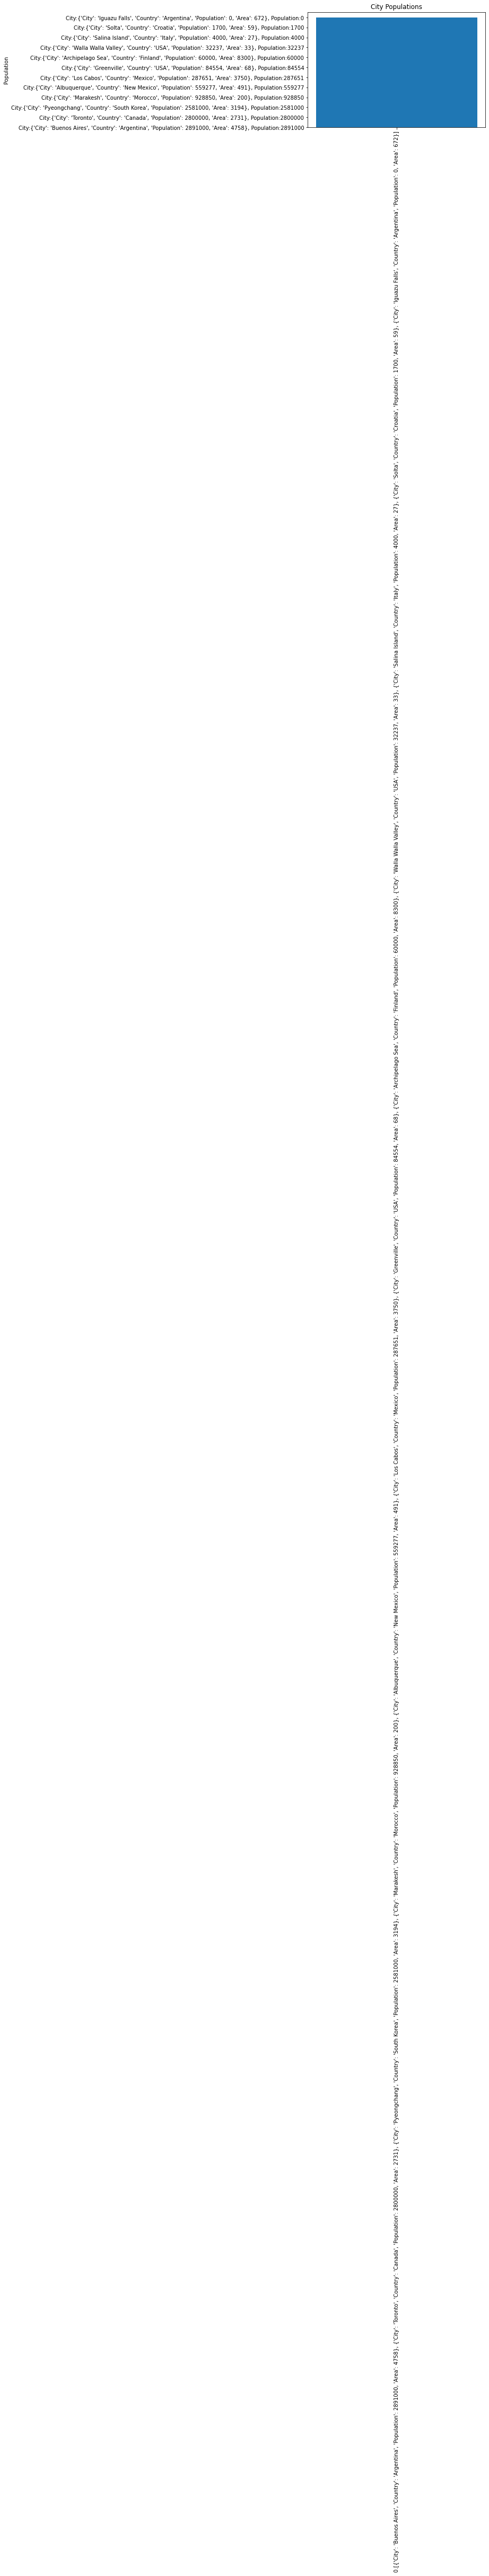

In [33]:
plt.bar(names_and_ranks, city_populations)
plt.xticks(rotation='vertical')
plt.ylabel('Population')
plt.title('City Populations')
plt.show()

Now we want declare a variable called `city_areas` that points to a list of all of the areas of the cities.  Let's use a `for` loop to iterate through our `cities` and have `city_areas` equal to each area of the city.  

In [36]:
city_areas = []
#write a for loop that adds the 'Area' of each city to the list city_areas
for city, area in zip(cities, areas):
    formatted_string = f"City: {city}, Area:{area}km2"
    city_areas.append(formatted_string)
    
for item in city_areas:
    print(item)

City: {'City': 'Buenos Aires', 'Country': 'Argentina', 'Population': 2891000, 'Area': 4758}, Area:4758km2
City: {'City': 'Toronto', 'Country': 'Canada', 'Population': 2800000, 'Area': 2731}, Area:2731km2
City: {'City': 'Pyeongchang', 'Country': 'South Korea', 'Population': 2581000, 'Area': 3194}, Area:3194km2
City: {'City': 'Marakesh', 'Country': 'Morocco', 'Population': 928850, 'Area': 200}, Area:200km2
City: {'City': 'Albuquerque', 'Country': 'New Mexico', 'Population': 559277, 'Area': 491}, Area:491km2
City: {'City': 'Los Cabos', 'Country': 'Mexico', 'Population': 287651, 'Area': 3750}, Area:3750km2
City: {'City': 'Greenville', 'Country': 'USA', 'Population': 84554, 'Area': 68}, Area:68km2
City: {'City': 'Archipelago Sea', 'Country': 'Finland', 'Population': 60000, 'Area': 8300}, Area:8300km2
City: {'City': 'Walla Walla Valley', 'Country': 'USA', 'Population': 32237, 'Area': 33}, Area:33km2
City: {'City': 'Salina Island', 'Country': 'Italy', 'Population': 4000, 'Area': 27}, Area:27k

Now that we have the city areas and populations, let's plot them to see how the size of each city compares to its population. 

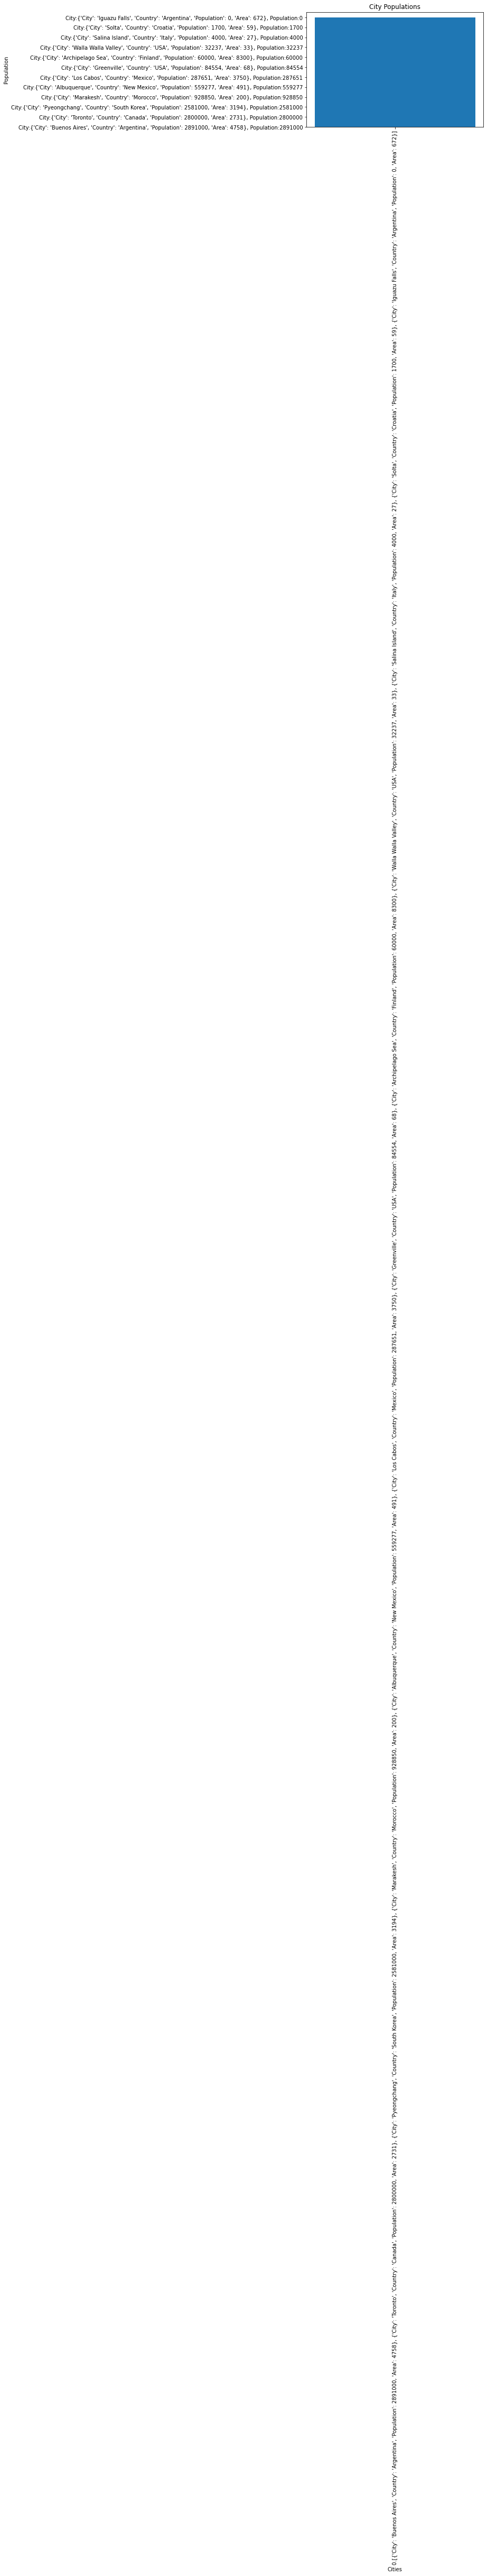

In [37]:
plt.bar(names_and_ranks, city_populations)

plt.ylabel('Population')
plt.xlabel('Cities')
plt.title('City Populations')
plt.xticks(rotation='vertical')
 
plt.show()

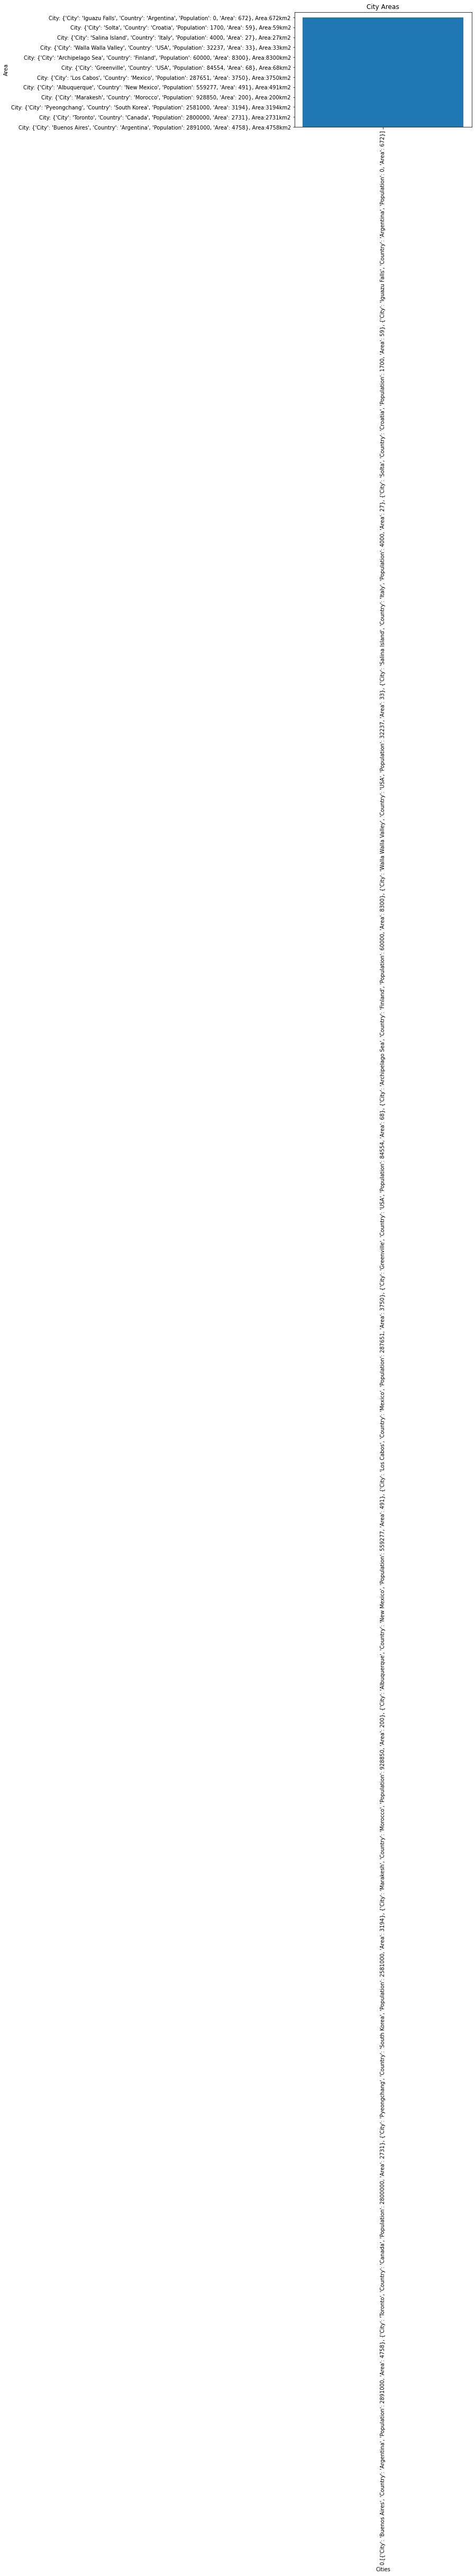

In [38]:
plt.bar(names_and_ranks, city_areas)
plt.ylabel('Area')
plt.xlabel('Cities')
plt.title('City Areas')
plt.xticks(rotation='vertical')
 
plt.show()

## Summary

In this section we saw how we can use `for` loops to go through elements of a list and perform the same operation on each.  By using `for` loops we were able to reduce the amount of code that we wrote and write more expressive code.